#설치해야 할 프로그램
pandas
scikit-learn
matplotlib
mglearn
#pip install -U 프로그램이름

In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
import pandas as pd
import matplotlib
import numpy as np

In [3]:
(pd.__version__, matplotlib.__version__, sklearn.__version__, np.__version__)

NameError: name 'sklearn' is not defined

## 데이터 적재

## 살펴보기

pandas로 데이터를 합쳐야 하는데 책에서는 합치지 않았음
1. size
2. 관측자료
3. 데이터 타입
위의 3가지를 확인해야 한다.

In [6]:
from preamble import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [7]:
iris=load_iris()
iris.keys()
iris['target'] #enumerate : 분류의 이름을 숫자로 바꿔놓음
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X_train, X_test, y_train, y_test= train_test_split(iris['data'], iris['target'], random_state=42)

In [9]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [10]:
X_test.shape, y_test.shape

((38, 4), (38,))

## 학습 및 모델

In [11]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
X_new=np.array([[5,2.9,1,0.2]])
X_new.shape

(1, 4)

ValueError: 'c' argument has 112 elements, which is inconsistent with 'x' and 'y' with size 150.

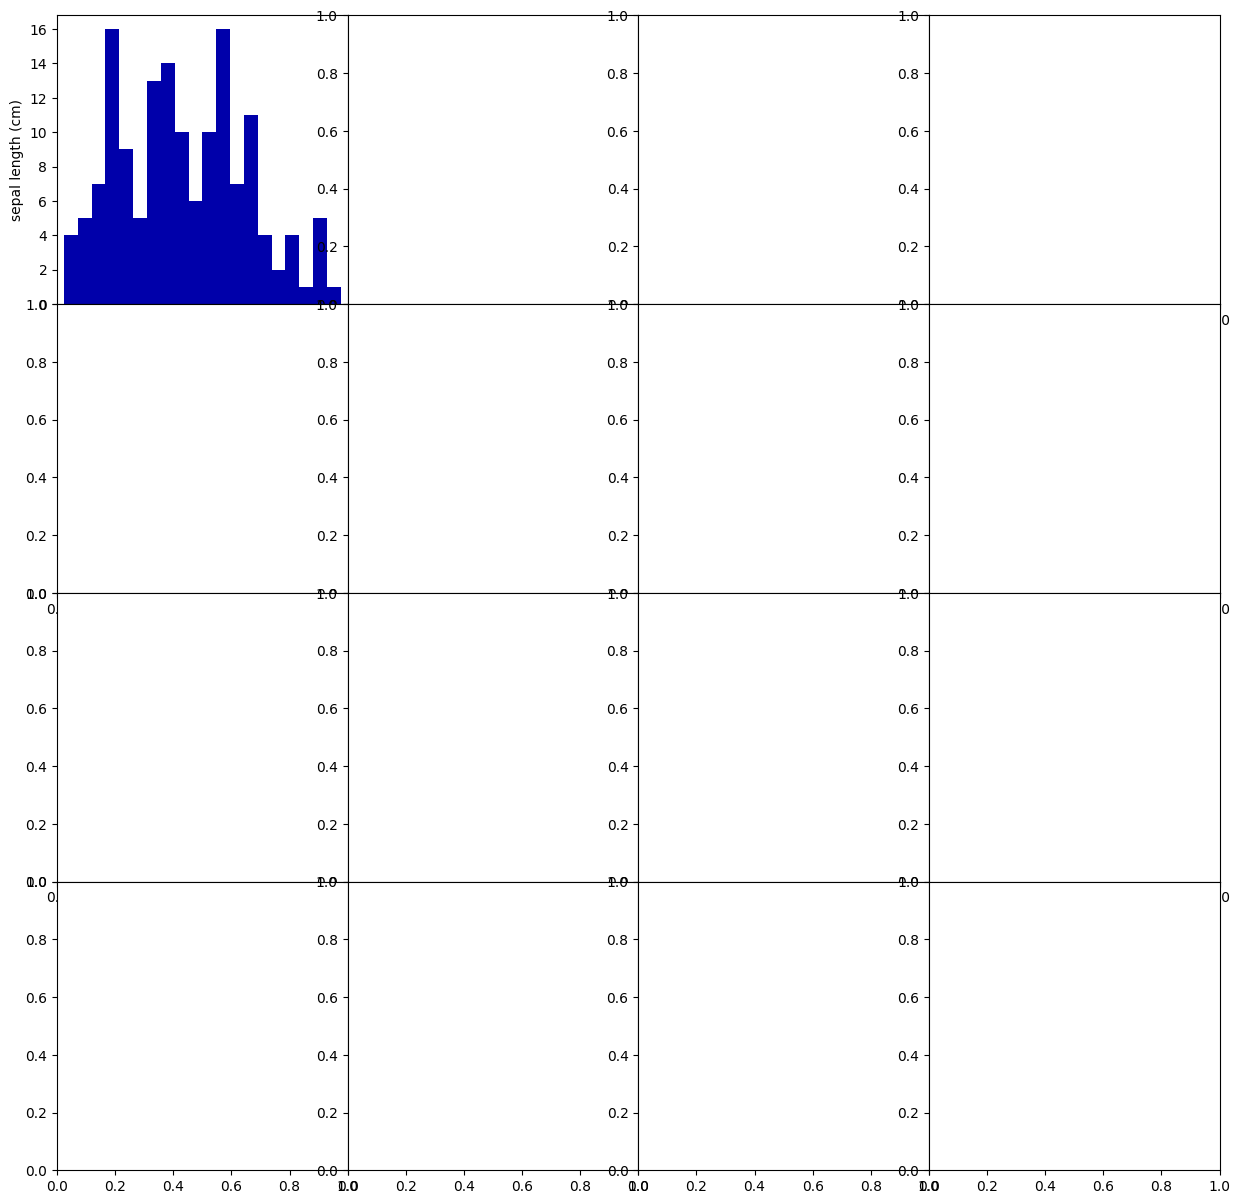

In [18]:
df= pd.DataFrame(iris['data'], columns=iris['feature_names'])
pd.plotting.scatter_matrix(df, c=y_train, figsize=(15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [ ]:
knn.score(X_test,y_test) #print("{:.2f}".format(np.mean(y_pred ==y_test))) 대신 사용하기

1.0

In [ ]:
prediction=knn.predict(X_new)
print("예측 : ", prediction)
print("예측 타겟 이름 : ", iris['target_names'][prediction]) #iris_datasets를 iris로 선언했으므로 iris로 검색해야 한다.

예측 :  [0]
예측 타겟 이름 :  ['setosa']


In [ ]:
y_pred=knn.predict(X_test)
y_pred
print("{:.2f}".format(np.mean(y_pred ==y_test)))

1.00


scikit-learn dataset을 사용해서 문제를 풀 때 target은 숫자로 나타나 있고 정답이라고 볼 수 있다.
data가 문제로 나온다.
머신을 학습시키기 위해서 훈련시킬 문제와 답안지와 테스트할 문제와 답안지를 임의로 균등하게 나누어야 한다.

## 평가 및 검증

<h3>붓꽃 품종 분류</h3>

분류: 꽃잎+꽃받침=>품종